In [0]:
import pandas as pd
import io
df = pd.read_csv('csv_result-Phishing_features.csv')

In [0]:
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [0]:
y = df['Result']

In [0]:
y=y.replace(-1,0)
y

0        0
1        0
2        0
3        0
4        1
5        1
6        0
7        0
8        1
9        0
10       1
11       0
12       0
13       0
14       1
15       0
16       0
17       0
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       1
28       1
29       1
        ..
11025    1
11026    1
11027    1
11028    1
11029    0
11030    0
11031    1
11032    0
11033    1
11034    0
11035    1
11036    1
11037    0
11038    0
11039    0
11040    0
11041    1
11042    1
11043    0
11044    1
11045    1
11046    1
11047    0
11048    1
11049    0
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

In [0]:
X = df.iloc[:,1:31]

In [0]:
X.head()  

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train,X_test = X_train.values,X_test.values
y_train,y_test = y_train.values,y_test.values


In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
7406/7406 [==============================] - 3s 368us/sample - loss: 0.1957 - acc: 0.9221
Epoch 2/5
7406/7406 [==============================] - 2s 288us/sample - loss: 0.1376 - acc: 0.9450
Epoch 3/5
7406/7406 [==============================] - 2s 295us/sample - loss: 0.1107 - acc: 0.9548
Epoch 4/5
7406/7406 [==============================] - 2s 300us/sample - loss: 0.0982 - acc: 0.9575
Epoch 5/5
3649/3649 [==============================] - 0s 87us/sample - loss: 0.1027 - acc: 0.9559


[0.10267040678232328, 0.9558783]

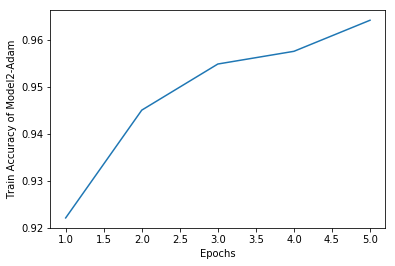

In [0]:
l=[0.9221,0.9450,0.9548,0.9575,0.9641]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.ylabel('Train Accuracy of Model2-Adam')
plt.xlabel('Epochs')
plt.plot(l1,l)

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 307us/sample - loss: 0.2006 - acc: 0.9176
Epoch 2/5
7406/7406 [==============================] - 2s 272us/sample - loss: 0.1411 - acc: 0.9423
Epoch 3/5
7406/7406 [==============================] - 2s 268us/sample - loss: 0.1171 - acc: 0.9521
Epoch 4/5
7406/7406 [==============================] - 2s 270us/sample - loss: 0.1028 - acc: 0.9569
Epoch 5/5
3649/3649 [==============================] - 0s 109us/sample - loss: 0.1315 - acc: 0.9512


[0.13149743561068114, 0.9512195]

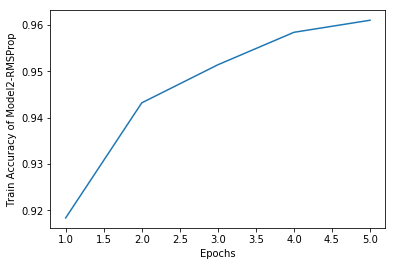

In [0]:
l=[0.9184,0.9432,0.9514,0.9584,0.9610]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.ylabel('Train Accuracy of Model2-RMSProp')
plt.xlabel('Epochs')
plt.plot(l1,l)

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 242us/sample - loss: 0.4878 - acc: 0.8415
Epoch 2/5
7406/7406 [==============================] - 1s 201us/sample - loss: 0.2420 - acc: 0.9237
Epoch 3/5
7406/7406 [==============================] - 2s 211us/sample - loss: 0.1977 - acc: 0.9295
Epoch 4/5
7406/7406 [==============================] - 2s 208us/sample - loss: 0.1822 - acc: 0.9328
Epoch 5/5
3649/3649 [==============================] - 0s 84us/sample - loss: 0.1801 - acc: 0.9282


[0.18008839431512058, 0.9281995]

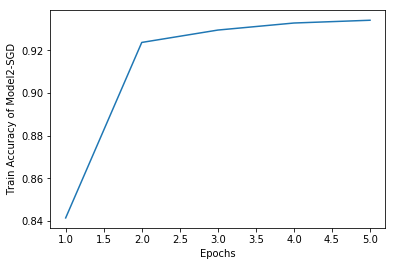

In [0]:
l=[0.8415,0.9237,0.9295,0.9328,0.9341]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.ylabel('Train Accuracy of Model2-SGD')
plt.xlabel('Epochs')
plt.plot(l1,l)

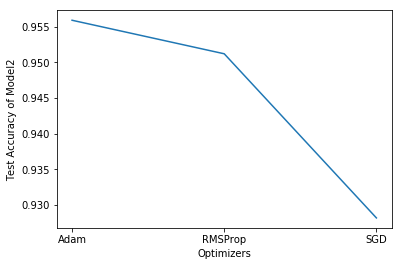

In [0]:
l=[0.9559,0.9512,0.9282]
l1 = ['Adam','RMSProp','SGD']
import matplotlib.pyplot as plt
plt.ylabel('Test Accuracy of Model2')
plt.xlabel('Optimizers')
plt.plot(l1,l)

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
7406/7406 [==============================] - 4s 592us/sample - loss: 0.1967 - acc: 0.9194
Epoch 2/5
7406/7406 [==============================] - 4s 542us/sample - loss: 0.1342 - acc: 0.9427
Epoch 3/5
7406/7406 [==============================] - 4s 545us/sample - loss: 0.1132 - acc: 0.9537
Epoch 4/5
7406/7406 [==============================] - 4s 540us/sample - loss: 0.0961 - acc: 0.9599
Epoch 5/5
3649/3649 [==============================] - 0s 125us/sample - loss: 0.1283 - acc: 0.9479


[0.12834409176568262, 0.94793093]

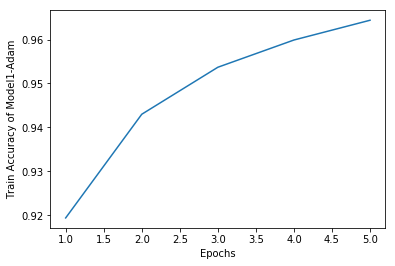

In [0]:
l=[0.9194,0.9430,0.9537,0.9599,0.9644]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.ylabel('Train Accuracy of Model1-Adam')
plt.xlabel('Epochs')
plt.plot(l1,l)

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 4s 496us/sample - loss: 0.2137 - acc: 0.9191
Epoch 2/5
7406/7406 [==============================] - 3s 454us/sample - loss: 0.1439 - acc: 0.9442
Epoch 3/5
7406/7406 [==============================] - 3s 464us/sample - loss: 0.1191 - acc: 0.9511
Epoch 4/5
7406/7406 [==============================] - 3s 465us/sample - loss: 0.1064 - acc: 0.9584
Epoch 5/5
3649/3649 [==============================] - 0s 127us/sample - loss: 0.1303 - acc: 0.9529


[0.13028898693786545, 0.9528638]

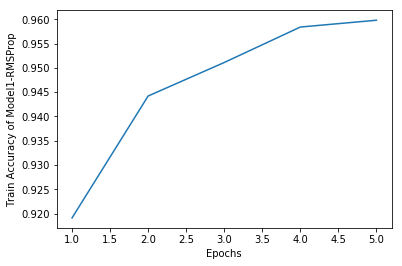

In [0]:
l=[0.9191,0.9442,0.9511,0.9584,0.9598]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.ylabel('Train Accuracy of Model1-RMSProp')
plt.xlabel('Epochs')
plt.plot(l1,l)

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 3s 413us/sample - loss: 0.5098 - acc: 0.7918
Epoch 2/5
7406/7406 [==============================] - 3s 374us/sample - loss: 0.2555 - acc: 0.9160
Epoch 3/5
7406/7406 [==============================] - 3s 366us/sample - loss: 0.2079 - acc: 0.9241
Epoch 4/5
7406/7406 [==============================] - 3s 371us/sample - loss: 0.1912 - acc: 0.9291
Epoch 5/5
3649/3649 [==============================] - 0s 134us/sample - loss: 0.1863 - acc: 0.9282


[0.18626050857296705, 0.9281995]

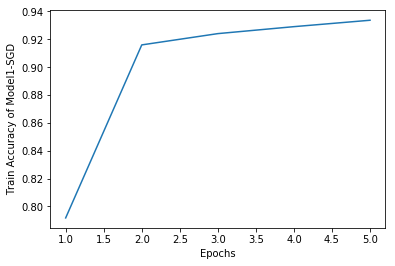

In [0]:
l=[0.7918,0.9160,0.9241,0.9291,0.9337]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.ylabel('Train Accuracy of Model1-SGD')
plt.xlabel('Epochs')
plt.plot(l1,l)

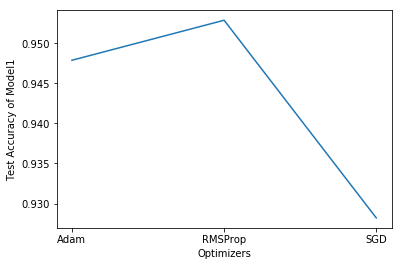

In [0]:
l=[0.9479,0.9529,0.9282]
l1 = ['Adam','RMSProp','SGD']
import matplotlib.pyplot as plt
plt.ylabel('Test Accuracy of Model1')
plt.xlabel('Optimizers')
plt.plot(l1,l)

In [0]:
pred = model.predict(X_test)

In [0]:
round(pred[7][0])

0.0

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 3s 365us/sample - loss: 0.5763 - acc: 0.8099
Epoch 2/5
7406/7406 [==============================] - 3s 343us/sample - loss: 0.2914 - acc: 0.9045
Epoch 3/5
7406/7406 [==============================] - 3s 345us/sample - loss: 0.2275 - acc: 0.9193
Epoch 4/5
7406/7406 [==============================] - 3s 345us/sample - loss: 0.1983 - acc: 0.9259
Epoch 5/5
3649/3649 [==============================] - 0s 116us/sample - loss: 0.1871 - acc: 0.9260


[0.1870557349425337, 0.92600715]

In [0]:
import numpy as np
l = np.array([[1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1]])
p= model.predict(l)

In [0]:
round(p[0][0])

0.0

In [0]:
round(pred[0][0])


0.0

In [0]:
y_test[0]

0

In [0]:
round(pred[9][0])

1.0

In [0]:
print(y_test[9])
pred = model.predict(X_test)

0


In [0]:
y_test[20]

0

In [0]:
round(pred[20][0])

0.0

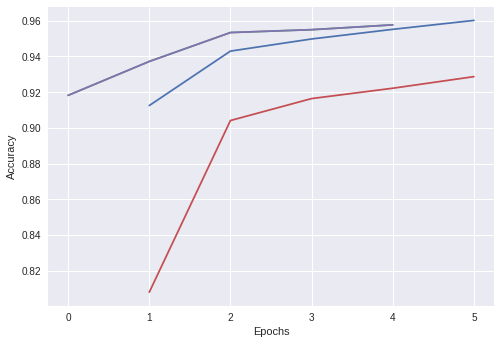

In [0]:
l=[0.9182,0.9372,0.9534,0.9550,0.9577]
l3=[0.8079,0.9041,0.9164,0.9222,0.9287]
l2=[0.9125,0.9430,0.9498,0.9552,0.9602]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(l1,l2,l)
plt.plot(l1,l3,l)

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 279us/sample - loss: 0.2411 - acc: 0.9013
Epoch 2/5
7406/7406 [==============================] - 2s 256us/sample - loss: 0.1591 - acc: 0.9357
Epoch 3/5
7406/7406 [==============================] - 2s 259us/sample - loss: 0.1317 - acc: 0.9483
Epoch 4/5
7406/7406 [==============================] - 2s 255us/sample - loss: 0.1205 - acc: 0.9522
Epoch 5/5
3649/3649 [==============================] - 0s 85us/sample - loss: 0.1163 - acc: 0.9545


[0.11630499277393536, 0.95450807]

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 217us/sample - loss: 0.5134 - acc: 0.8343
Epoch 2/5
7406/7406 [==============================] - 1s 193us/sample - loss: 0.2809 - acc: 0.9093
Epoch 3/5
7406/7406 [==============================] - 1s 193us/sample - loss: 0.2278 - acc: 0.9178
Epoch 4/5
7406/7406 [==============================] - 2s 206us/sample - loss: 0.2028 - acc: 0.9224
Epoch 5/5
3649/3649 [==============================] - 0s 86us/sample - loss: 0.1878 - acc: 0.9249


[0.18777581128103174, 0.92491096]

Text(0, 0.5, 'Train Accuracy')

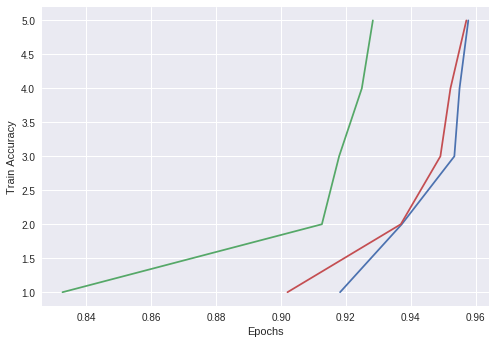

In [0]:
adam=[0.9182,0.9372,0.9534,0.9550,0.9577]
rms = [0.9020,0.9369,0.9491,0.9522,0.9571]
sgd = [0.8327,0.9126,0.9179,0.9249,0.9283]
l = [1,2,3,4,5]
plt.plot(adam,l)
plt.plot(sgd,l)
plt.plot(rms,l)
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 5s 619us/sample - loss: 0.2107 - acc: 0.9132
Epoch 2/5
7406/7406 [==============================] - 5s 610us/sample - loss: 0.1383 - acc: 0.9415
Epoch 3/5
7406/7406 [==============================] - 4s 596us/sample - loss: 0.1177 - acc: 0.9544
Epoch 4/5
7406/7406 [==============================] - 4s 571us/sample - loss: 0.1001 - acc: 0.9606
Epoch 5/5
3649/3649 [==============================] - 1s 158us/sample - loss: 0.1247 - acc: 0.9540


[0.12468271436479589, 0.95396]

Text(0.5, 0, 'Train Accuracy')

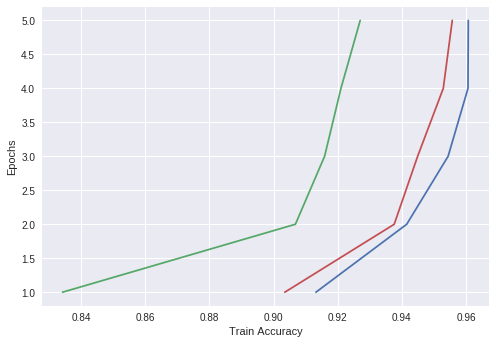

In [0]:
adam=[0.9132, 0.9415,0.9544,0.9606,0.9607]
rms = [0.9035,0.9376,0.9449,0.9529,0.9557]
sgd = [0.8342,0.9068,0.9159,0.9210,0.9270]
l = [1,2,3,4,5]
plt.plot(adam,l)
plt.plot(sgd,l)
plt.plot(rms,l)
plt.ylabel("Epochs")
plt.xlabel("Train Accuracy")

In [6]:
import numpy as np
def URLhavingattherate(URL): #4th column
    if '@' in URL:
        return 0
    else:
        return 1
def Redirectusingdoubleslash(URL):#5th column
    p=0
    for i in range(len(URL)-1):
        if URL[i]=="/" and URL[i+1]=="/":
            p=i
    if p>7:
        return 0
    else:
        return 1
def prefixsuffix(URL): #6th column
    if '-' in URL:
         return 0
    else:
        return 1
def Length(URL): #2nd column
    if len(URL)<54:
         return 1
    else:
        return 0.
def TinyURL(URL): #3rd column
    if 'bit.ly' in url:
         return 1
    else:
        return 0
def IP(URL):#1st Column
    if URL.count('x')>6:
        return 0
    else:
        return 1
def Dot(URL):#7th column
    if URL.count('.')>3:
        return 0
    else:
        return 1
def HTTPS(URL):#8th column
    if 'https' in URL:
        return 1
    else:
        return 0
def valid(e):
    if e<=1:
        return 1
    else:
        return 0
def favicon(f):
    if f==1:
        return 1
    else:
        return 0

def nonstandardport(port): #11
   if port == True:return 0 
   else: return 1

def requestUrl(URL): #13 column
    if URL>=22 and URL<=61:
        return 1
    else:
        return 0
def anchor(URL): #14column
    if URL>=31 and URL<=67:
        return 1
    else:
        return 0
def SFH(sfh): #16column
    if sfh=='':
        return 1
    else:
        return 0
def email(mail): #17column
    mail=0
    if mail==1:
        return 1
    else:
        return 0
def abnormal(URL): #18column
    hostname=''
    if URL==hostname:
        return 1
    else:
        return 0
def redirect(URL): #19column
    redirect=1
    if redirect>=2 and redirect<4:
        return 1
    else:
        return 0
def onmouseover(URL): #20colum
    if len(URL) >20:
        return 0
    else:
        return 1



    
def rightclick(URL): #21column
    if len(URL)>12:
        return 1
    else:
        return 0
def popup(txt): #22column
    if txt=="":
        return 0
    else:
        return 1


def iframe(frame): #23
    frame=0
    if frame==1:
        return 1
    else:
        return 0
def ageofdomain(month): #24
    #month = int(input('Enter the number to be converted: '))
    if month<6:
        return 1
    else:
        return 0
def dnsrecord(dns): #25
    if dns=='':
        return 1
    else:
        return 0
def websitetraffic(rank): #26
    if rank>=100000:
        return 1
    else:
        return 0
def pagerank(prank): #27
    if prank<0.2:
        return 1
    else :
        return 0
def googleindex(index): #28
    if index == True:
        return 1
    else:
        return 0

def numboflinks(link): #29
    if link>=0 and link<=2:
        return 1
    else:
        return 0

url = input()
exp = int(input())
L=[]
for i in range(30):
    L+=[0]
c9 = valid(exp)
L[8] = c9
c8 = Dot(url)
L[7] = c8
c7 = Dot(url)
L[6] = c7
c1 = IP(url)
L[0] = c1
c3 = TinyURL(url)
L[2]=c3
c2 = Length(url)
L[1] = c2
p = URLhavingattherate(url)
L[3]=p
k = Redirectusingdoubleslash(url)
L[4]=k
s = prefixsuffix(url)
L[5]=s
f = int(input())
c10 = favicon(f)
L[9] = c10
port = int(input('port'))
c11 = nonstandardport(port)
L[10]=c11
c12=requestUrl(url)
L[11]= c12
c13=anchor(url)
L[12]= c13
c14 = SFH(url)
L[13]= c14
mail = int(input('Mail'))
c15 = email(mail)
L[14] = c15
c16 = abnormal(url)
L[15] = c16
c17 = redirect(url)
L[16] = c17
c18 = onmouseover(url)
L[17] = c18
c19 = rightclick(url)
L[18] = c19
c20 = popup(url)
L[19] = c20
frame = int(input('frame'))
c21 = iframe(frame)
L[20] = c21
age = int(input('age'))
c22 = ageofdomain(age)
L[21] = c22
dns = int(input('dns'))
c23 = dnsrecord(dns)
L[22] = c23
rank = int(input('rank'))
c24 = websitetraffic(rank)
L[23] = c24
c25 = googleindex(rank)
L[24] = c25
links = int(input('Links'))
c26 = numboflinks(links)
L[25] = c26
for i in range(26,30):
    p = np.random.randn(1)
    if p>0.5:
        L[i] = 1
    else:
        L[i] = 0
print(*L)


KeyboardInterrupt: ignored